<a href="https://colab.research.google.com/github/fatuunreal/stki-2/blob/main/stki_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [38]:
# Memuat data dari file Excel
file_path = 'SimilarityTest.xlsx'  # Ganti dengan jalur file yang sebenarnya
data = pd.read_excel(file_path)

In [39]:
# Memuat data dari file Excel
file_path = 'SimilarityTest.xlsx'  # Ganti dengan jalur file yang sebenarnya
data = pd.read_excel(file_path)

# Asumsikan bahwa data teks relevan ada di kolom tertentu (misalnya, 'Unnamed: 1')
# Ganti 'Unnamed: 1' dengan nama kolom yang sebenarnya yang berisi data teks
dokumen = data['Unnamed: 1'].dropna()  # Menghapus nilai kosong (NaN)

# Convert all elements in 'dokumen' to strings before applying TF-IDF
dokumen = dokumen.astype(str) # This line converts all elements in the 'dokumen' Series to strings.

In [40]:
# Langkah 1: Membuat TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')  # Menggunakan stopword bahasa Inggris

In [41]:
# Langkah 2: Melakukan fit dan transformasi teks menjadi matriks TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(dokumen)

In [42]:
# Langkah 3: Menghitung matriks kemiripan cosine
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [43]:
# Langkah 4: Menampilkan matriks kemiripan cosine
cosine_sim_df = pd.DataFrame(cosine_sim, index=dokumen.index, columns=dokumen.index)

In [44]:
# Menampilkan beberapa baris pertama dari matriks kemiripan cosine
print(cosine_sim_df.head())

    4    5    6    7    8    9    10   11   12   13  ...   18   19   20   21  \
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    22   23   24   25   26   27  
4  0.0  0.0  0.0  0.0  0.0  0.0  
5  0.0  0.0  0.0  0.0  0.0  0.0  
6  0.0  0.0  0.0  0.0  0.0  0.0  
7  0.0  0.0  0.0  0.0  0.0  0.0  
8  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 22 columns]


In [46]:
# Misalnya, untuk dokumen tertentu, tampilkan 5 dokumen paling mirip
def rekomendasi_dokumen(index_dokumen, cosine_sim, dokumen, top_n=5):
    # Mengurutkan dokumen berdasarkan kesamaan
    similar_indices = cosine_sim[index_dokumen].argsort()[-top_n-1:-1][::-1]
    print(f"Rekomendasi dokumen untuk dokumen {index_dokumen}:")
    for i in similar_indices:
        print(f"- Dokumen {i} dengan skor kemiripan {cosine_sim[index_dokumen][i]}")

# Contoh penggunaan: Rekomendasi untuk dokumen pertama
rekomendasi_dokumen(0, cosine_sim, dokumen)

Rekomendasi dokumen untuk dokumen 0:
- Dokumen 20 dengan skor kemiripan 0.0
- Dokumen 1 dengan skor kemiripan 0.0
- Dokumen 2 dengan skor kemiripan 0.0
- Dokumen 3 dengan skor kemiripan 0.0
- Dokumen 4 dengan skor kemiripan 0.0


In [33]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as stopwords
# Bisa mengganti dengan stopword dalam bahasa Indonesia

In [34]:
# Contoh filter kategori
def rekomendasi_dengan_kategori(index_dokumen, cosine_sim, dokumen, kategori, top_n=5):
    similar_indices = cosine_sim[index_dokumen].argsort()[-top_n-1:-1][::-1]
    for i in similar_indices:
        if dokumen['Kategori'][i] == kategori:
            print(f"- Dokumen {i} dalam kategori {kategori} dengan skor kemiripan {cosine_sim[index_dokumen][i]}")


In [47]:
# Contoh pencarian dokumen berdasarkan input teks
def pencarian_dokumen(teks_kueri, tfidf_vectorizer, dokumen, cosine_sim):
    # Transformasi teks kueri menjadi vektor TF-IDF
    kueri_vector = tfidf_vectorizer.transform([teks_kueri])

    # Hitung kesamaan kueri dengan dokumen
    sim_kueri = cosine_similarity(kueri_vector, tfidf_matrix).flatten()

    # Urutkan berdasarkan skor kemiripan
    similar_indices = sim_kueri.argsort()[-5:][::-1]

    # Tampilkan dokumen paling mirip
    for i in similar_indices:
        print(f"- Dokumen {i} dengan skor kemiripan {sim_kueri[i]}")

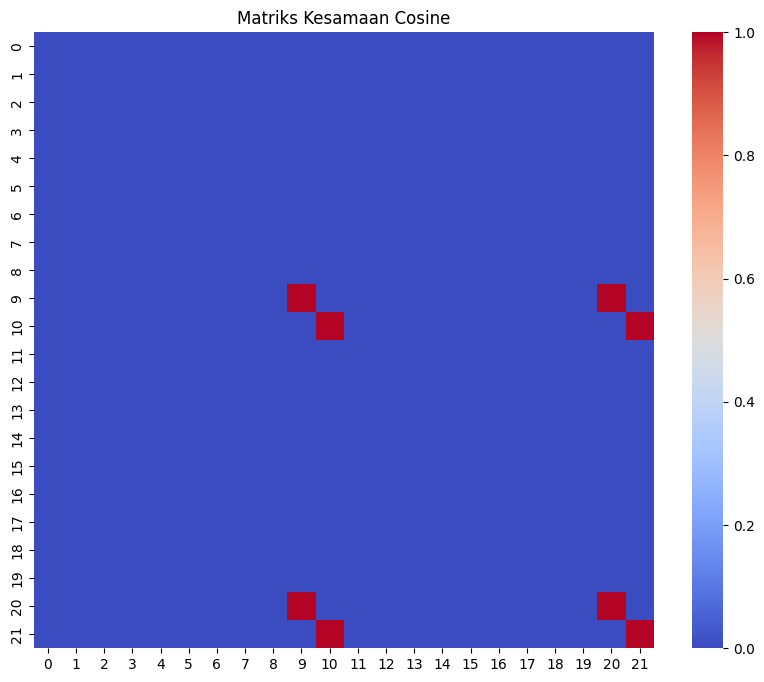

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat heatmap dari matriks kesamaan
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim, cmap='coolwarm')
plt.title('Matriks Kesamaan Cosine')
plt.show()